✅ Environment Setup Complete!
Pandas version: 2.3.3
NumPy version: 2.3.5
✅ Synthetic insurance data created!
Total policies: 10,000

First few rows:
DATASET OVERVIEW

📊 Dataset Shape: 10,000 rows × 16 columns

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   policy_id             10000 non-null  object 
 1   state                 10000 non-null  object 
 2   county                10000 non-null  object 
 3   latitude              10000 non-null  float64
 4   longitude             10000 non-null  float64
 5   property_value        10000 non-null  int64  
 6   year_built            10000 non-null  int32  
 7   building_type         10000 non-null  object 
 8   distance_to_water_km  10000 non-null  float64
 9   elevation_meters      10000 non-null  float64
 10  vegetation_density    10000 non-null  float

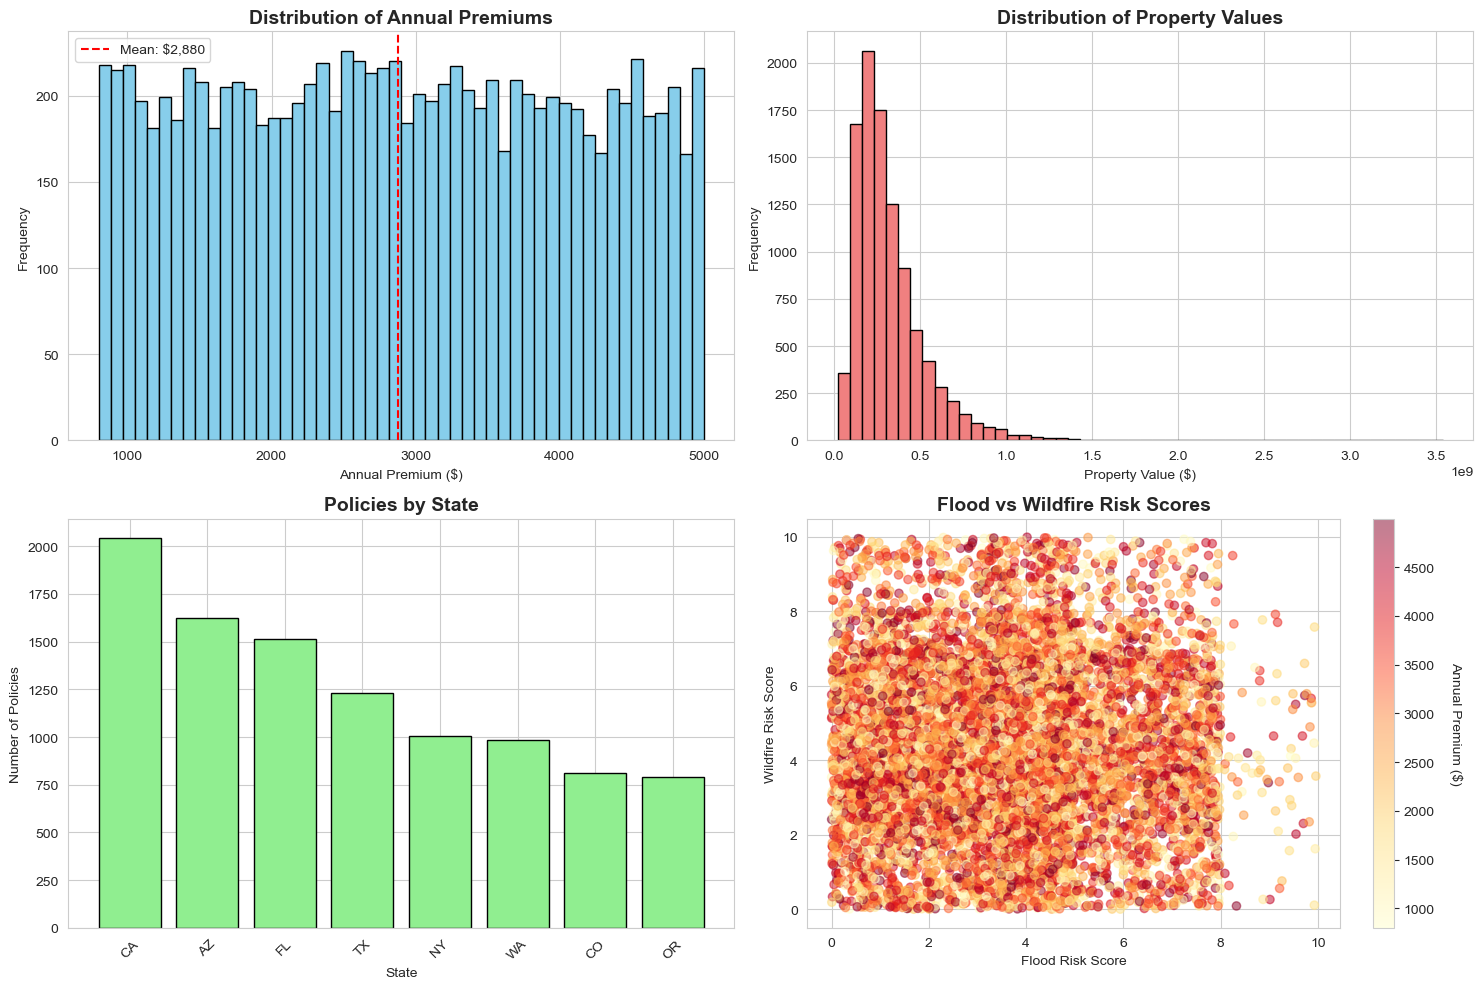

✅ Preliminary visualizations saved!


In [20]:
# ============================================
# CLIMATE RISK INSURANCE PROJECT - LEVEL 1
# Data Collection & Setup
# ============================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Environment Setup Complete!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")



# ============================================
# CREATING SYNTHETIC INSURANCE CLAIMS DATA
# ============================================

np.random.seed(42)  # For reproducibility

# Number of policies
n_policies = 10000

# Generate synthetic data
data = {
    'policy_id': [f'POL_{str(i).zfill(6)}' for i in range(1, n_policies+1)],
    
    # Geographic information
    'state': np.random.choice(['CA', 'FL', 'TX', 'NY', 'CO', 'WA', 'OR', 'AZ'], n_policies, 
                              p=[0.20, 0.15, 0.12, 0.10, 0.08, 0.10, 0.08, 0.17]),
    'county': np.random.choice(['County_A', 'County_B', 'County_C', 'County_D', 'County_E'], n_policies),
    
    # Coordinates (latitude, longitude) - rough US bounds
    'latitude': np.random.uniform(25.0, 49.0, n_policies),
    'longitude': np.random.uniform(-125.0, -65.0, n_policies),
    
    # Property information
    'property_value': np.random.lognormal(mean=12.5, sigma=0.6, size=n_policies).astype(int) * 1000,
    'year_built': np.random.randint(1950, 2024, n_policies),
    'building_type': np.random.choice(['Single Family', 'Multi Family', 'Commercial'], n_policies,
                                     p=[0.65, 0.25, 0.10]),
    
    # Risk factors
    'distance_to_water_km': np.random.exponential(scale=5, size=n_policies),
    'elevation_meters': np.random.uniform(0, 2000, n_policies),
    'vegetation_density': np.random.uniform(0, 1, n_policies),  # 0=bare, 1=dense forest
    
    # Historical claims
    'claims_last_5yr': np.random.poisson(lam=0.3, size=n_policies),
    'total_claims_amount': np.random.exponential(scale=15000, size=n_policies).astype(int),
    
    # Current premium (to be predicted/optimized)
    'annual_premium': np.random.uniform(800, 5000, n_policies).astype(int),
}

# Create DataFrame
df_insurance = pd.DataFrame(data)

# Add climate event exposure (we'll refine this with real climate data later)
df_insurance['flood_risk_score'] = (
    (df_insurance['distance_to_water_km'] < 2).astype(int) * 3 +
    (df_insurance['elevation_meters'] < 100).astype(int) * 2 +
    np.random.uniform(0, 5, n_policies)
)

df_insurance['wildfire_risk_score'] = (
    (df_insurance['vegetation_density'] > 0.7).astype(int) * 3 +
    (df_insurance['state'].isin(['CA', 'OR', 'WA', 'CO'])).astype(int) * 2 +
    np.random.uniform(0, 5, n_policies)
)

# Save to CSV
df_insurance.to_csv('Projects/Climate Risk Assessment Portfolio/data/raw/insurance_policies_synthetic.csv',index=False)


print("✅ Synthetic insurance data created!")
print(f"Total policies: {len(df_insurance):,}")
print(f"\nFirst few rows:")
df_insurance.head()




# ============================================
# INITIAL DATA EXPLORATION
# ============================================

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# Dataset shape
print(f"\n📊 Dataset Shape: {df_insurance.shape[0]:,} rows × {df_insurance.shape[1]} columns")

# Column information
print(f"\n📋 Column Information:")
print(df_insurance.info())

# Statistical summary
print(f"\n📈 Statistical Summary:")
print(df_insurance.describe())

# Missing values check
print(f"\n❓ Missing Values:")
print(df_insurance.isnull().sum())

# Data types
print(f"\n🔤 Data Types:")
print(df_insurance.dtypes.value_counts())



# ============================================
# PRELIMINARY VISUALIZATIONS
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Premium distribution
axes[0, 0].hist(df_insurance['annual_premium'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Annual Premiums', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Annual Premium ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_insurance['annual_premium'].mean(), color='red', linestyle='--', 
                    label=f'Mean: ${df_insurance["annual_premium"].mean():,.0f}')
axes[0, 0].legend()

# 2. Property value distribution
axes[0, 1].hist(df_insurance['property_value'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Property Values', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Property Value ($)')
axes[0, 1].set_ylabel('Frequency')

# 3. State distribution
state_counts = df_insurance['state'].value_counts()
axes[1, 0].bar(state_counts.index, state_counts.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Policies by State', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('State')
axes[1, 0].set_ylabel('Number of Policies')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Risk scores scatter
axes[1, 1].scatter(df_insurance['flood_risk_score'], df_insurance['wildfire_risk_score'], 
                   alpha=0.5, c=df_insurance['annual_premium'], cmap='YlOrRd')
axes[1, 1].set_title('Flood vs Wildfire Risk Scores', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Flood Risk Score')
axes[1, 1].set_ylabel('Wildfire Risk Score')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Annual Premium ($)', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('outputs/visualizations/01_initial_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Preliminary visualizations saved!")







In [19]:
from pathlib import Path

project_root = Path.home() / "Projects" / "Climate Risk Assessment Portfolio"

viz_path = project_root / "outputs" / "visualizations"
viz_path.mkdir(parents=True, exist_ok=True)

plt.savefig(viz_path / "01_initial_exploration.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1200x600 with 0 Axes>

In [ ]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

BASE_DIR = Path.cwd()

nasa_path = BASE_DIR / "data/raw/nasa_disasters.csv"
county_path = BASE_DIR / "data/raw/census_boundaries/tl_2023_us_county.shp"

df = pd.read_csv(nasa_path)
gdf = gpd.read_file(county_path)


In [14]:
from pathlib import Path

PROJECT_ROOT = Path.home() / "Projects" / "Climate Risk Assessment Portfolio"

RAW_DATA = PROJECT_ROOT / "data" / "raw"
CENSUS_DIR = RAW_DATA / "census_boundaries"
FEMA_DIR = RAW_DATA / "fema_nri"

RAW_DATA.mkdir(parents=True, exist_ok=True)
CENSUS_DIR.mkdir(exist_ok=True)
FEMA_DIR.mkdir(exist_ok=True)

print("✅ Folder structure created")

import shutil

src = Path(r"C:\Users\patil\Downloads\pend-gdis-1960-2018-disasterlocations-csv\pend-gdis-1960-2018-disasterlocations.csv")
dst = RAW_DATA / "nasa_disasters.csv"

shutil.copy(src, dst)


print("✅ NASA disaster CSV copied")

src_dir = Path(r"C:\Users\patil\Downloads\tl_2023_us_county")

for file in src_dir.glob("tl_2023_us_county.*"):
    shutil.copy(file, CENSUS_DIR)

print("✅ Census shapefile copied (all components)")


from pathlib import Path
import shutil

PROJECT_ROOT = Path.home() / "Projects" / "Climate Risk Assessment Portfolio"
FEMA_DIR = PROJECT_ROOT / "data" / "raw" / "fema_nri"
FEMA_DIR.mkdir(parents=True, exist_ok=True)

src_dir = Path(r"C:\Users\patil\Downloads\NRI_Shapefile_Counties") 


for file in src_dir.iterdir():
    if file.is_file():
        shutil.copy(file, FEMA_DIR)

print("✅ FEMA NRI STATE shapefile copied successfully")



✅ Folder structure created
✅ NASA disaster CSV copied
✅ Census shapefile copied (all components)
✅ FEMA NRI STATE shapefile copied successfully


In [13]:
src_dir = Path(r"C:\Users\patil\Downloads\tl_2023_us_county")

for file in src_dir.glob("tl_2023_us_county.*"):
    shutil.copy(file, CENSUS_DIR)

print("✅ Census shapefile copied (all components)")

✅ Census shapefile copied (all components)
